In [81]:
import os
import glob
import numpy as np
import pandas as pd
import scipy
from nilearn import plotting
import nilearn
import nibabel as nib

In [38]:
stat_file = '/media/Data/work/trauma_seed_leftAmg_sub-1263_ses-1_z_MNI.nii.gz'
#stat_file = '/home/or/kpe_task_analysis/trauma_seed_leftAmg_sub-1263_ses-1_z.nii.gz'
anat_img = '/media/Data/KPE_BIDS/sub-1263/ses-1/anat/sub-1263_ses-1_T1w.nii.gz'

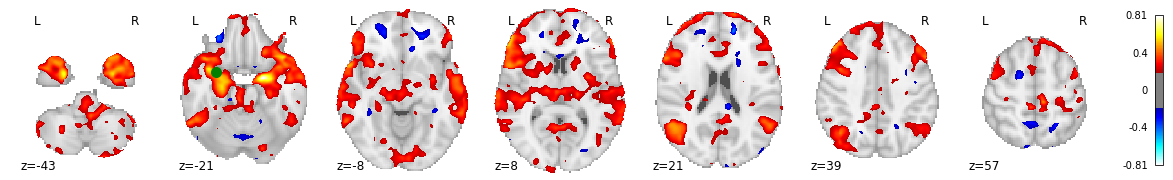

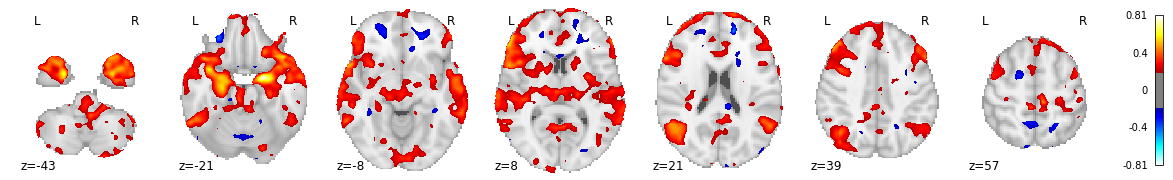

In [57]:
amygdala_coords = [(-31,4,-22)]
%matplotlib inline
display1 = plotting.plot_stat_map(stat_file,threshold = 0.2, display_mode= 'z')
display1.add_markers(marker_coords= amygdala_coords, marker_color='g',
                    marker_size=100)

display2 = plotting.plot_stat_map(stat_file,threshold = 0.2, display_mode= 'z')


## Run group level analysis of seed-based connectivity

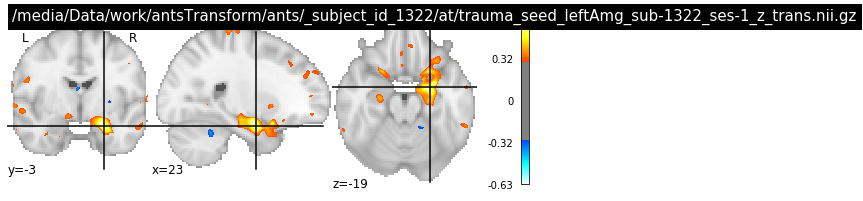

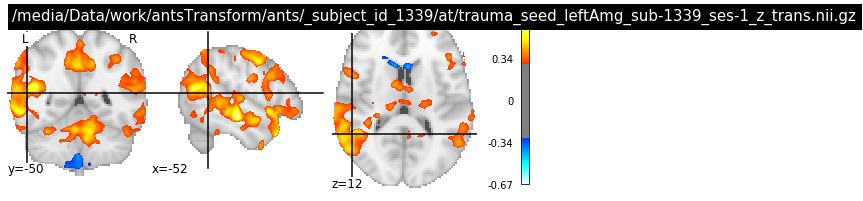

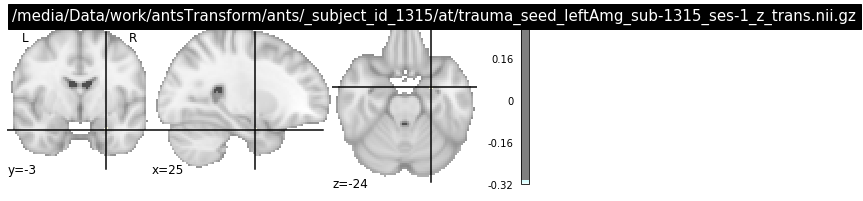

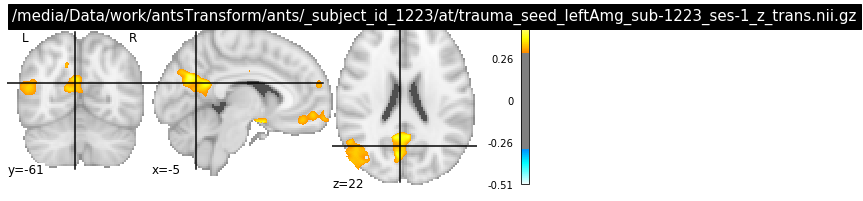

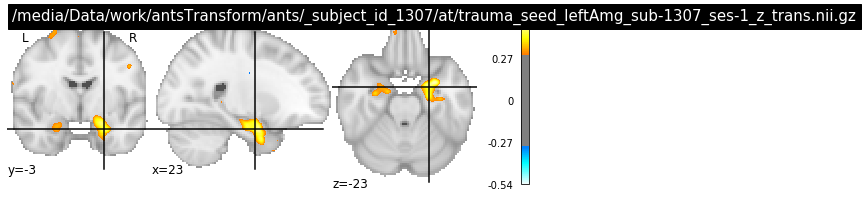

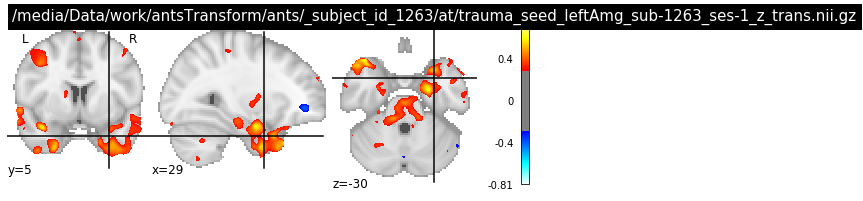

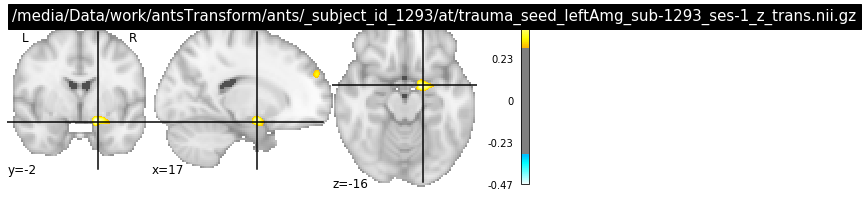

In [62]:
# read all file (depend on seed) in MNI space
tstat_list = glob.glob('/media/Data/work/antsTransform/ants/_subject_id_*/at/trauma_seed_leftAmg_sub-*_ses-1_z_trans.nii.gz')
# plot them
for stat in tstat_list:
    plotting.plot_stat_map(stat, threshold=0.3, title = stat)
# concatenate them

# run randomise to check 2nd level

# plot results

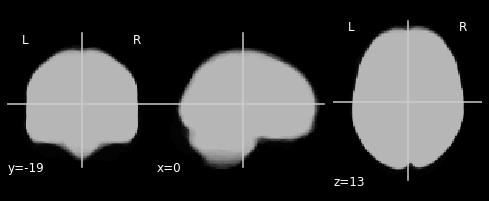

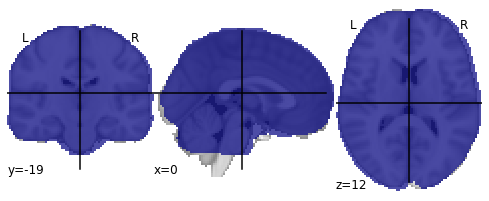

In [69]:
import nilearn
mask_img_temp = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-*/ses-[1,2]/func/sub-*_ses-[1,2]_task-Memory_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
mask_files = glob.glob(mask_img_temp)
mean_mask = nilearn.image.mean_img(mask_files, n_jobs=3)
plotting.plot_anat(mean_mask)

group_mask = nilearn.image.math_img("a>=0.95", a=mean_mask)
nilearn.plotting.plot_roi(group_mask)

In [70]:
#%% Creating concatenated contrast (across subjects) and group mask
copes_concat = nilearn.image.concat_imgs(tstat_list, auto_resample=True)
copes_concat.to_filename("/media/Data/work/ses1_trauma_leftAmg.nii.gz")


group_mask = nilearn.image.resample_to_img(group_mask, copes_concat, interpolation='nearest')
group_mask.to_filename(os.path.join("/media/Data/work/",  "group_mask.nii.gz"))

#%% Running randomization
from  nipype.interfaces import fsl
import nipype.pipeline.engine as pe  # pypeline engine
randomize = pe.Node(interface = fsl.Randomise(), base_dir = '/media/Data/work/KPE_SPM/fslRandomize',
                    name = 'randomize')
randomize.inputs.in_file = "/media/Data/work/ses1_trauma_leftAmg.nii.gz" # choose which file to run permutation test on
randomize.inputs.mask = '/media/Data/work/group_mask.nii.gz' # group mask file (was created earlier)
randomize.inputs.one_sample_group_mean = True
randomize.inputs.tfce = True
randomize.inputs.vox_p_values = True
randomize.inputs.num_perm = 200
#randomize.inputs.var_smooth = 5

randomize.run()

200116-15:14:21,583 nipype.workflow INFO:
	 [Node] Setting-up "randomize" in "/media/Data/work/KPE_SPM/fslRandomize/randomize".
200116-15:14:21,587 nipype.workflow INFO:
	 [Node] Outdated cache found for "randomize".
200116-15:14:21,681 nipype.workflow INFO:
	 [Node] Running "randomize" ("nipype.interfaces.fsl.model.Randomise"), a CommandLine Interface with command:
randomise -i /media/Data/work/ses1_trauma_leftAmg.nii.gz -o "randomise" -m /media/Data/work/group_mask.nii.gz -n 200 -1 -T -x
200116-15:14:21,814 nipype.interface INFO:
	 stdout 2020-01-16T15:14:21.814365:randomise options: -i /media/Data/work/ses1_trauma_leftAmg.nii.gz -o randomise -m /media/Data/work/group_mask.nii.gz -n 200 -1 -T -x 
200116-15:14:23,835 nipype.interface INFO:
	 stdout 2020-01-16T15:14:23.835348:Loading Data: 
200116-15:14:23,836 nipype.interface INFO:
	 stdout 2020-01-16T15:14:23.835348:Data loaded
200116-15:14:23,915 nipype.interface INFO:
	 stdout 2020-01-16T15:14:23.914983:One-sample design detected; 

200116-15:16:03,58 nipype.interface INFO:
	 stdout 2020-01-16T15:16:03.058006:Starting permutation 69
200116-15:16:04,555 nipype.interface INFO:
	 stdout 2020-01-16T15:16:04.554992:Starting permutation 70
200116-15:16:05,899 nipype.interface INFO:
	 stdout 2020-01-16T15:16:05.899730:Starting permutation 71
200116-15:16:07,68 nipype.interface INFO:
	 stdout 2020-01-16T15:16:07.068748:Starting permutation 72
200116-15:16:08,19 nipype.interface INFO:
	 stdout 2020-01-16T15:16:08.019355:Starting permutation 73
200116-15:16:09,631 nipype.interface INFO:
	 stdout 2020-01-16T15:16:09.631183:Starting permutation 74
200116-15:16:11,183 nipype.interface INFO:
	 stdout 2020-01-16T15:16:11.183592:Starting permutation 75
200116-15:16:12,448 nipype.interface INFO:
	 stdout 2020-01-16T15:16:12.448289:Starting permutation 76
200116-15:16:13,524 nipype.interface INFO:
	 stdout 2020-01-16T15:16:13.523904:Starting permutation 77
200116-15:16:14,706 nipype.interface INFO:
	 stdout 2020-01-16T15:16:14.7064

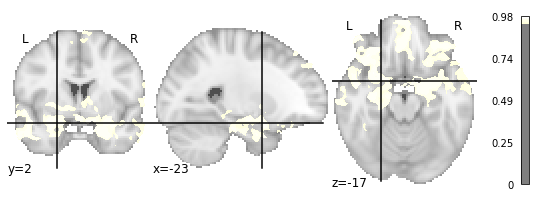

In [73]:
nilearn.plotting.plot_stat_map('/media/Data/work/KPE_SPM/fslRandomize/randomize/randomise_tfce_corrp_tstat1.nii.gz', 
                              threshold = 0.95)

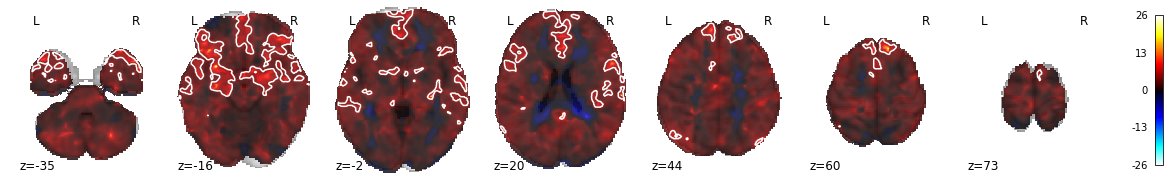

In [79]:
#%% Graph it
fig = nilearn.plotting.plot_stat_map('/media/Data/work/KPE_SPM/fslRandomize/randomize/randomise_tstat1.nii.gz', alpha=0.8, display_mode = 'z')
fig.add_contours('/media/Data/work/KPE_SPM/fslRandomize/randomize/randomise_tfce_corrp_tstat1.nii.gz', levels=[0.95,1], colors='w')

In [82]:
# visualize results
t_plot = nib.load('/media/Data/work/KPE_SPM/fslRandomize/randomize/randomise_tstat1.nii.gz')
p = nib.load('/media/Data/work/KPE_SPM/fslRandomize/randomize/randomise_tfce_corrp_tstat1.nii.gz')
# suggested threshold should be a=0.005 / .001

thr = 0.95
t_plot_data = t_plot.get_data()
p_data = p.get_data()

# threshold raw t map by p values
p_mask = p_data < thr
t_plot_data[p_mask] = 0

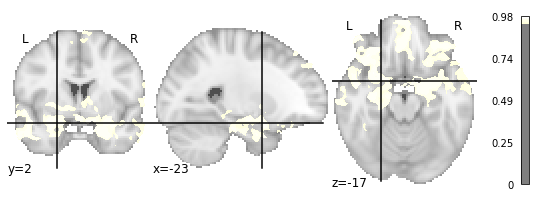

In [84]:
plotting.plot_stat_map(p, threshold = 0.95)

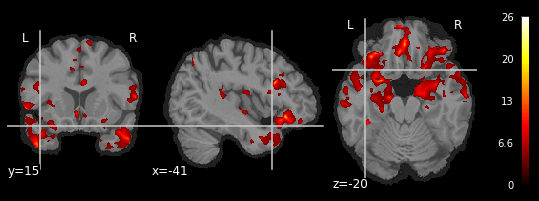

In [86]:
anat_mean = '/media/Data/KPE_BIDS/derivatives/fmriprep/sub-1322/anat/sub-1322_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

plotting.plot_stat_map(t_plot,
                      bg_img = anat_mean)
